# FINAL PROJECT
# Predicting Calorie Burn



#### Anastasiia Golovatenko
#### Manuel Lopez Videla Garcia

## Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
%matplotlib inline

## Exploratory data analysis and data pre-processing

In [108]:
calories = pd.read_csv('calories.csv') 
exercise = pd.read_csv('exercise.csv') 
data = pd.concat([exercise,calories['Calories']], axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [109]:
#Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [110]:
#Data types
print("\nData Types:")
print(data.dtypes)


Data Types:
User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


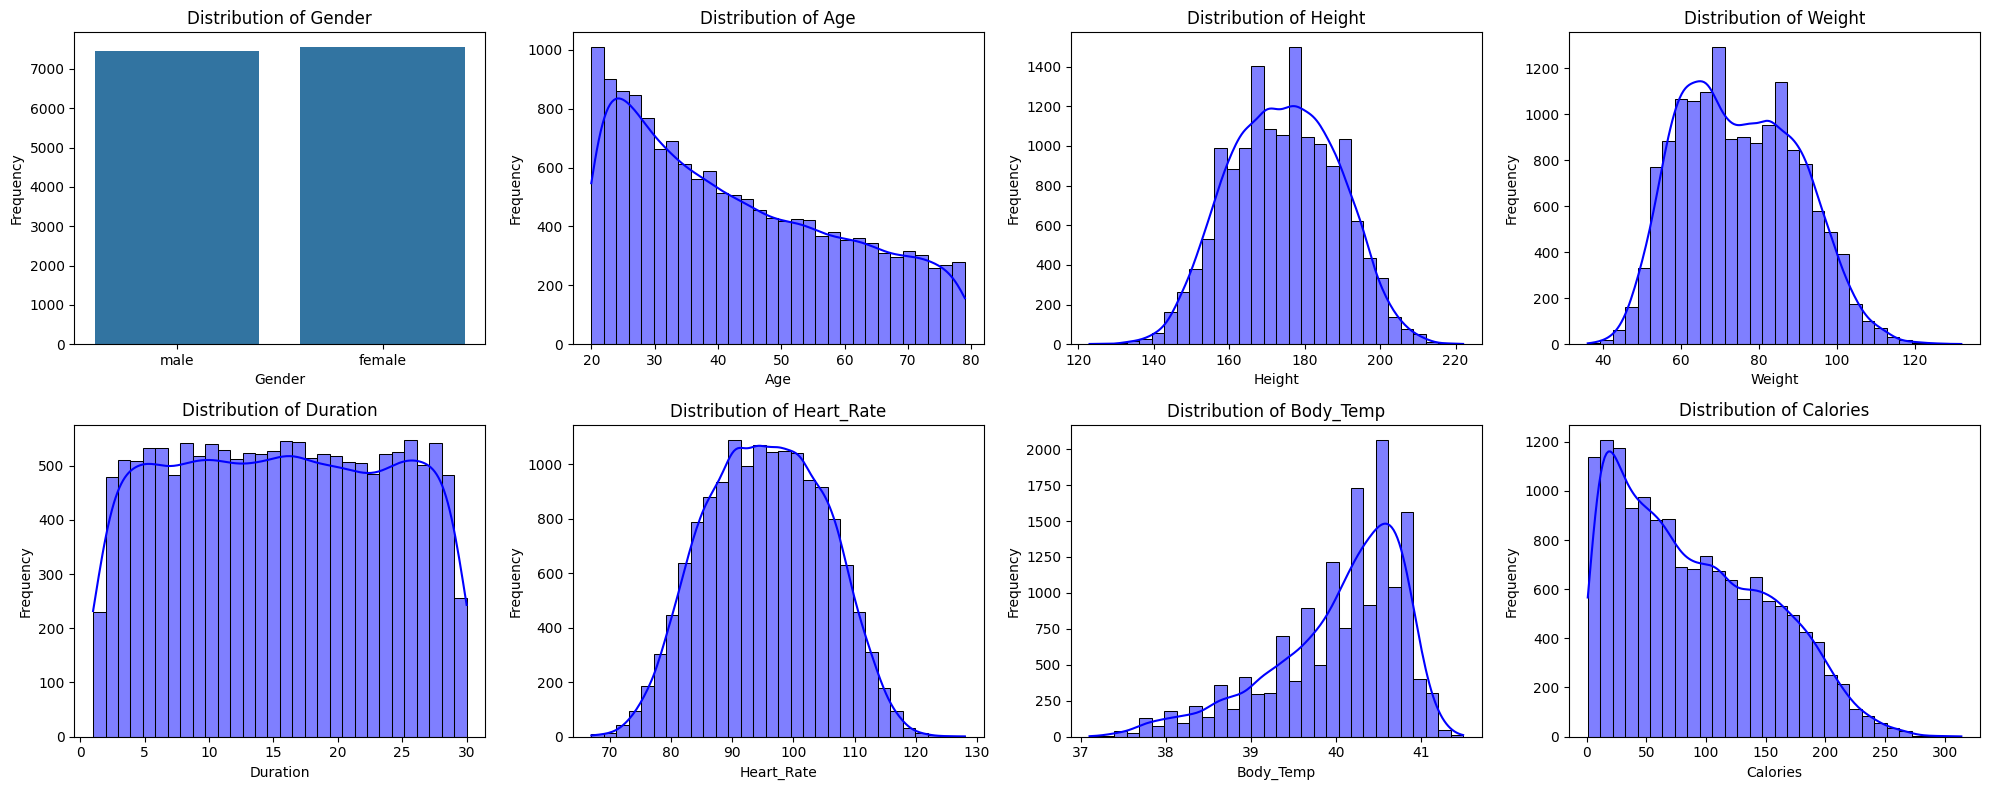

In [111]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, (ax, column) in enumerate(zip(axes.flatten(), [col for col in data.columns if col != 'User_ID'])):
    if data[column].dtype in ['int64', 'float64']:
        sns.histplot(data[column], kde=True, bins=30, color='blue', ax=ax)
    else:
        sns.countplot(x=data[column], ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[i + 1:]: # Remove unused axes
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [112]:
columns = [col for col in data.columns if col != 'User_ID' and col != 'Gender']

outlier_columns = []
for column in columns:
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    if not outliers.empty:
        outlier_columns.append(column)

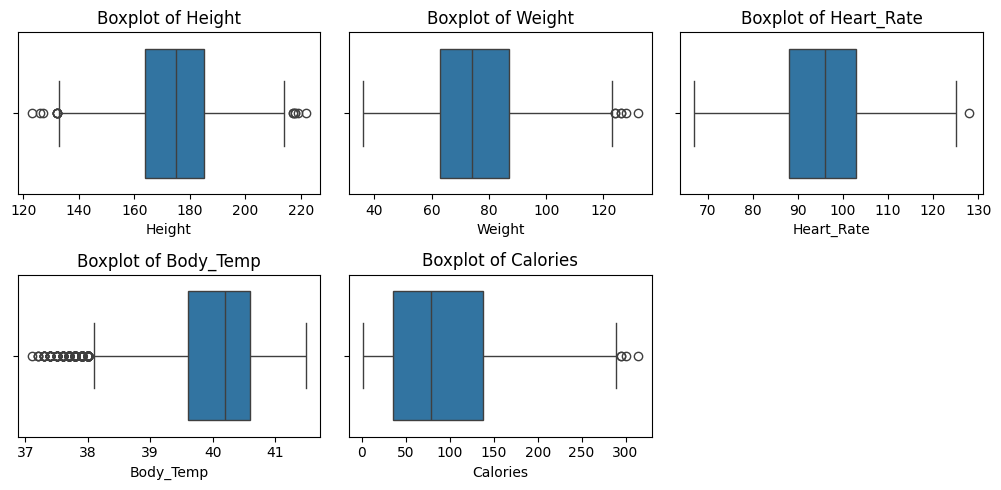

In [113]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for i, column in enumerate(outlier_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel(column)

for j in range(len(outlier_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

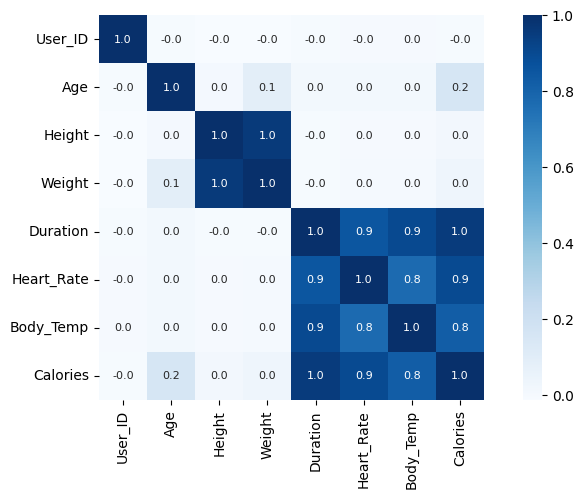

In [114]:
correlation = data.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

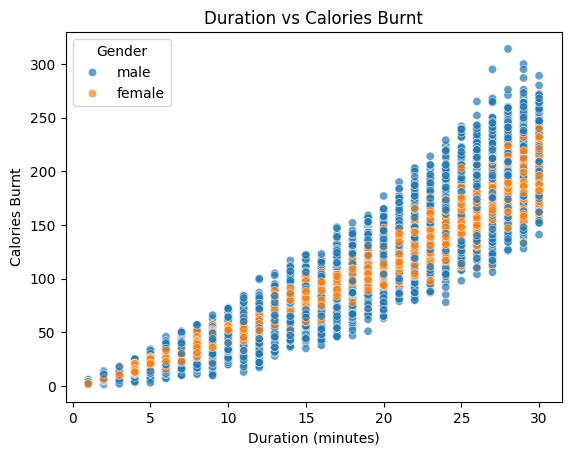

In [115]:
sns.scatterplot(x = 'Duration', y = 'Calories', data = data, hue ='Gender', alpha = 0.7)
plt.title('Duration vs Calories Burnt')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burnt')
plt.show()

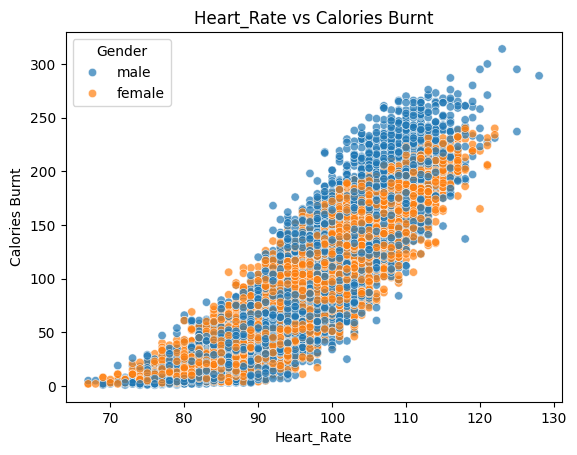

In [116]:
sns.scatterplot(x='Heart_Rate', y='Calories', data=data, hue='Gender', alpha=0.7) 
plt.title('Heart_Rate vs Calories Burnt')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories Burnt')
plt.show()

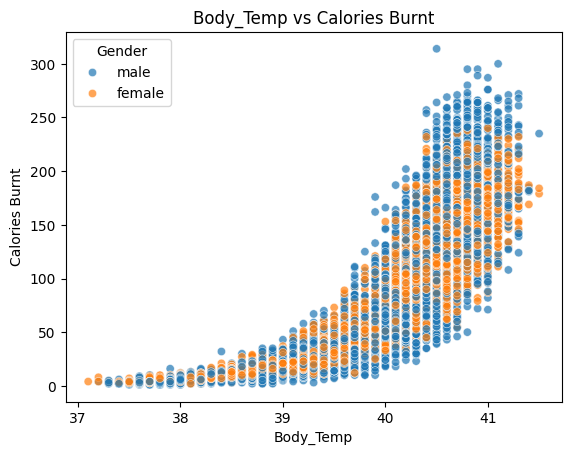

In [117]:
sns.scatterplot(x='Body_Temp', y='Calories', data=data, hue='Gender', alpha=0.7) 
plt.title('Body_Temp vs Calories Burnt')
plt.xlabel('Body_Temp')
plt.ylabel('Calories Burnt')
plt.show()

In [57]:
data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

## Modeling 

In [58]:
#Feature matrix
X = data.drop(columns = ['User_ID','Calories'], axis=1)
y = data['Calories'] 

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#Standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [59]:
# Linear Regression, Lasso, Ridge, SVR
standardized_models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("SVR", SVR())
]

mae_scores_standardized = []
mse_scores_standardized = []
rmse_scores_standardized = []
r2_scores_standardized = []

coefficients = {}  # To store coefficients for each model

for model_name, model in standardized_models:
    regressor = model.fit(X_train_standardized, y_train)
    y_pred = regressor.predict(X_test_standardized)
    
    # Append performance metrics
    mae_scores_standardized.append(mean_absolute_error(y_test, y_pred))
    mse_scores_standardized.append(mean_squared_error(y_test, y_pred))
    rmse_scores_standardized.append(root_mean_squared_error(y_test, y_pred)) 
    r2_scores_standardized.append(r2_score(y_test, y_pred))
    
    # Extract coefficients if available
    if hasattr(model, 'coef_'):
        coefficients[model_name] = model.coef_

In [60]:
# Display coefficients for Linear Regression, Lasso, and Ridge
for model_name, coef in coefficients.items():
    print(f"{model_name} Coefficients:")
    for feature, value in zip(X_train.columns, coef):
        print(f"  {feature}: {value:.4f}")
    print()

Linear Regression Coefficients:
  Gender: 0.5582
  Age: 8.4844
  Height: -2.4652
  Weight: 4.3420
  Duration: 55.2295
  Heart_Rate: 19.2160
  Body_Temp: -13.1730

Lasso Coefficients:
  Gender: -0.0000
  Age: 7.7882
  Height: 0.0000
  Weight: 0.5554
  Duration: 45.2761
  Heart_Rate: 18.6869
  Body_Temp: -2.7563

Ridge Coefficients:
  Gender: 0.5564
  Age: 8.4844
  Height: -2.4574
  Weight: 4.3326
  Duration: 55.1919
  Heart_Rate: 19.2244
  Body_Temp: -13.1443



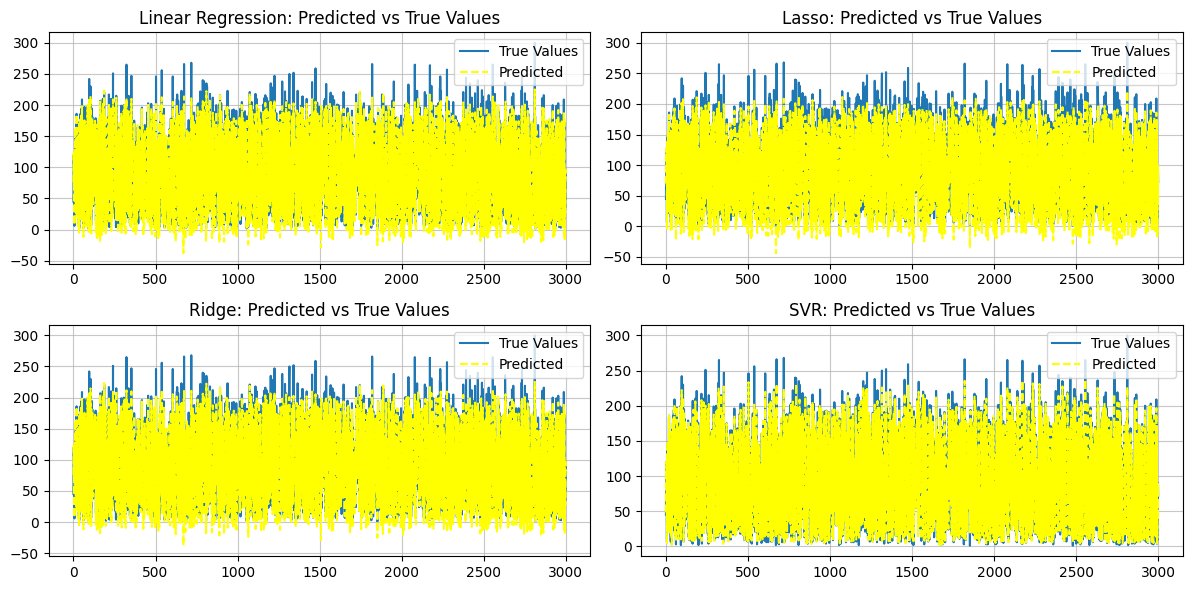

In [89]:
# Plotting predicted vs true values for standardized models
plt.figure(figsize=(12, 6))

for i, (model_name, model) in enumerate(standardized_models):
    regressor = model.fit(X_train_standardized, y_train)
    y_pred = regressor.predict(X_test_standardized)
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test.values, label="True Values")
    plt.plot(y_pred, '--', label=f"Predicted", color = 'yellow')
    plt.title(f"{model_name}: Predicted vs True Values")
    plt.legend()
    plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [70]:
#Decision tree, Random Forest
non_standardized_models = [
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor())
]

mae_scores_non_standardized = []
mse_scores_non_standardized = []
rmse_scores_non_standardized = []
r2_scores_non_standardized = []

for model_name, model in non_standardized_models:
    regressor = model.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores_non_standardized.append(mean_absolute_error(y_test, y_pred))
    mse_scores_non_standardized.append(mean_squared_error(y_test, y_pred))
    rmse_scores_non_standardized.append(root_mean_squared_error(y_test, y_pred))
    r2_scores_non_standardized.append(r2_score(y_test, y_pred))

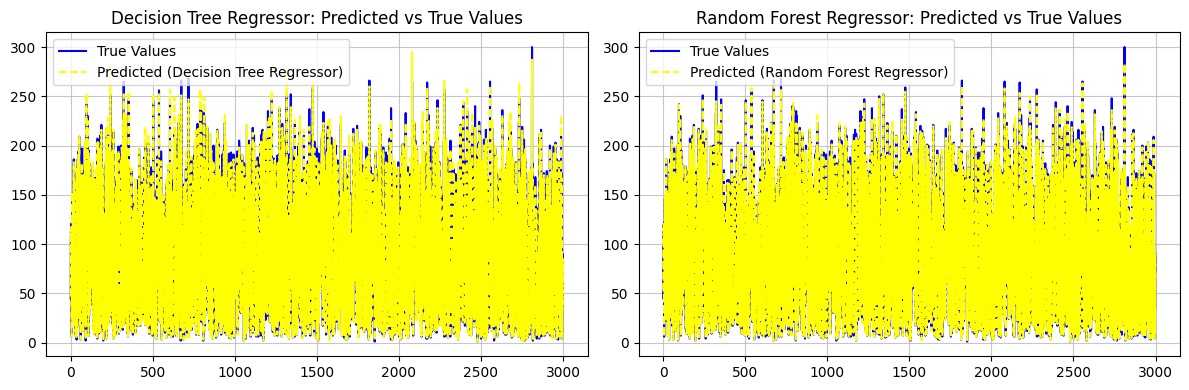

In [88]:
# Plotting predicted vs true values for non-standardized model
plt.figure(figsize=(12, 4))

for i, (model_name, model) in enumerate(non_standardized_models):
    regressor = model.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    plt.subplot(1, 2, i + 1)
    plt.plot(y_test.values, label="True Values", color = 'blue')  
    plt.plot(y_pred, '--', label=f"Predicted ({model_name})", color = 'yellow')
    plt.title(f"{model_name}: Predicted vs True Values")
    plt.legend()
    plt.grid(alpha=0.7)

plt.tight_layout()
plt.show()

In [64]:
regression_metrics_df = pd.DataFrame({
    "Model": [model[0] for model in standardized_models] + [model[0] for model in non_standardized_models],
    "Mean Absolute Error": mae_scores_standardized + mae_scores_non_standardized,
    "Mean Squared Error": mse_scores_standardized + mse_scores_non_standardized,
    "Root Mean Squared Error": rmse_scores_standardized + rmse_scores_non_standardized,
    "R-squared (R2)": r2_scores_standardized + r2_scores_non_standardized
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,8.272389,125.390475,11.197789,0.967390
Lasso,9.103082,151.039710,12.289821,0.960719
Ridge,8.272581,125.401336,11.198274,0.967387
SVR,2.252633,29.724349,5.452004,0.992270
Decision Tree Regressor,3.377667,26.750333,5.172072,0.993043
Random Forest Regressor,1.663530,6.623226,2.573563,0.998278


In [80]:
#Function to predict calories burned (with Random Forest Regressor)
rf_model = RandomForestRegressor(random_state=45)
rf_model.fit(X_train, y_train)

def predict_calories(gender, age, height, weight, duration, heart_rate, body_temp):
    """
    Predict calories burned based on input parameters.
    
    Parameters:
        - gender (int): Gender encoded as 0 or 1
        - age (int): Age of the individual
        - height (float): Height of the individual in cm
        - weight (float): Weight of the individual in kg
        - duration (float): Duration of the activity in minutes
        - heart_rate (float): Heart rate during activity
        - body_temp (float): Body temperature in °C
    
    Returns:
        - Predicted calories burned (float)
    """
    # Create input features array
    input_features = np.array([[gender, age, height, weight, duration, heart_rate, body_temp]])
    # Predict using the trained model
    calories_burned = rf_model.predict(input_features)
    return calories_burned[0]

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
# Example
example_prediction = predict_calories(
    gender=1,      # Example: 1 for female
    age=30,        # Age in years
    height=175,    # Height in cm
    weight=70,     # Weight in kg
    duration=45,   # Activity duration in minutes
    heart_rate=120, # Heart rate during activity
    body_temp=37.0  # Body temperature in °C
)

print(f"Predicted calories burned: {example_prediction:.2f}")

Predicted calories burned: 229.22
